# Quick usage of CovserPhy

## Preparation

In [1]:
import os
os.chdir("../")

In [2]:
import covsirphy as cs
cs.__version__

'2.4.1'

## Dataset preparation

In [3]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

### The number of cases (JHU style)

In [4]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation


In [5]:
print(data_loader.covid19dh_citation)

Australian Bureau of Statistics (2019), https://www.abs.gov.au/
CIA - Central Intelligence Agency (2018), https://www.cia.gov/
CIA - Central Intelligence Agency (2019), https://www.cia.gov/
CIA - Central Intelligence Agency (2020), https://www.cia.gov/
COVID-19 Turkey API (2020), https://github.com/
COVID-19_plus_Russia GitHub repository (2020), https://github.com/
COVID19-India API (2020), https://www.covid19india.org/
Canada's National Statistical Agency (2020), https://www150.statcan.gc.ca/
Centre of Excellence in Economics and Data Science, University of Milano (2020), https://github.com/
Covid19data.com.au (2020), https://github.com/
Czech Statistical Office (2018), https://www.czso.cz/
Data Science for Social Impact research group, University of Pretoria (2020), https://github.com/
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be/
Eurostat (2019), https://ec.europa.eu/
Geloky (2019), https://geloky.com/
Istituto Nazionale di Statistica, Italia (2018), htt

In [6]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
138507,2020-07-04,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
138508,2020-07-05,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
138509,2020-07-06,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
138510,2020-07-07,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
138511,2020-07-08,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04


In [7]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
138507,2020-07-04,Colombia,Vichada,1,0,0,1
138508,2020-07-05,Colombia,Vichada,1,0,0,1
138509,2020-07-06,Colombia,Vichada,1,0,0,1
138510,2020-07-07,Colombia,Vichada,1,0,0,1
138511,2020-07-08,Colombia,Vichada,1,0,0,1


In [8]:
# Subset for a country
jhu_data.subset("Japan", province="Tokyo").tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
171,2020-07-04,Japan,Tokyo,6654,747,325,5582
172,2020-07-05,Japan,Tokyo,6765,823,325,5617
173,2020-07-06,Japan,Tokyo,6867,900,325,5642
174,2020-07-07,Japan,Tokyo,6973,942,325,5706
175,2020-07-08,Japan,Tokyo,7048,1017,325,5706


In [9]:
# Total
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-07-04,16820085,8255352,778206,7786527,0.046266,0.462930,0.090862
2020-07-05,17090455,8376364,782323,7931768,0.045775,0.464105,0.089777
2020-07-06,17311690,8429352,786922,8095416,0.045456,0.467627,0.088594
2020-07-07,17612409,8546088,794496,8271825,0.045110,0.469659,0.087632
2020-07-08,17612701,8563528,794500,8254673,0.045109,0.468677,0.087798


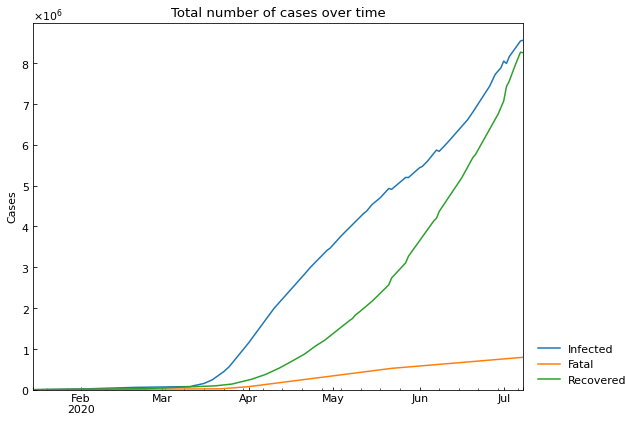

In [10]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

### (Optional) Replace the dataset in Japan


In [11]:
jhu_data.subset("Japan").tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
170,2020-07-03,Japan,-,19286,1448,976,16862
171,2020-07-04,Japan,-,19559,1628,976,16955
172,2020-07-05,Japan,-,19767,1766,976,17025
173,2020-07-06,Japan,-,19943,1866,977,17100
174,2020-07-07,Japan,-,20154,1985,979,17190


In [12]:
japan_data = data_loader.japan()
print(japan_data.citation)

Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan


In [13]:
jhu_data.replace(japan_data)
jhu_data.subset("Japan").tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
143,2020-07-03,Japan,-,19068,1226,976,16866
144,2020-07-04,Japan,-,19282,1346,977,16959
145,2020-07-05,Japan,-,19522,1495,977,17050
146,2020-07-06,Japan,-,19775,1674,977,17124
147,2020-07-07,Japan,-,19981,1806,978,17197


### Population in each country

In [14]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation


In [15]:
# Raw data (the same as jhu_data)
population_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
138507,2020-07-04,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
138508,2020-07-05,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
138509,2020-07-06,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
138510,2020-07-07,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
138511,2020-07-08,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04


In [16]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Population
782,CZE,Czech Republic,Plzenský kraj,584672
783,COL,Colombia,Bolívar,2070110
784,RUS,Russia,Murmansk oblast,795409
785,RUS,Russia,Republic of Crimea,1913731
786,COL,Colombia,Vichada,107808


In [17]:
population_data.value("Japan", province=None)

126529100

In [18]:
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_data.value("Japan", province="Tokyo")

13942856

### Government Response Tracker (OxCGRT)

In [19]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation


In [20]:
# Raw data (the same as jhu_data)
oxcgrt_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
138507,2020-07-04,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
138508,2020-07-05,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
138509,2020-07-06,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
138510,2020-07-07,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04
138511,2020-07-08,1,1,0,107808.0,COL,Vichada,Colombia,3,2,2,4,1,2,2,4,2,2,2,87.04


In [21]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
138507,2020-07-04,Colombia,COL,3,2,2,4,1,2,2,4,2,2,2,87.04
138508,2020-07-05,Colombia,COL,3,2,2,4,1,2,2,4,2,2,2,87.04
138509,2020-07-06,Colombia,COL,3,2,2,4,1,2,2,4,2,2,2,87.04
138510,2020-07-07,Colombia,COL,3,2,2,4,1,2,2,4,2,2,2,87.04
138511,2020-07-08,Colombia,COL,3,2,2,4,1,2,2,4,2,2,2,87.04


In [22]:
# Subset for a country
oxcgrt_data.subset(country="Japan").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
171,2020-07-04,2,0,1,0,0,0,0,3,2,2,1,27.78
172,2020-07-05,2,0,1,0,0,0,0,3,2,2,1,27.78
173,2020-07-06,2,0,1,0,0,0,0,3,2,2,1,27.78
174,2020-07-07,2,0,1,0,0,0,0,3,2,2,1,27.78
175,2020-07-08,2,0,1,0,0,0,0,3,2,2,1,27.78


In [23]:
# Subset for a country (using ISO3 code)
oxcgrt_data.subset(iso3="JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
171,2020-07-04,2,0,1,0,0,0,0,3,2,2,1,27.78
172,2020-07-05,2,0,1,0,0,0,0,3,2,2,1,27.78
173,2020-07-06,2,0,1,0,0,0,0,3,2,2,1,27.78
174,2020-07-07,2,0,1,0,0,0,0,3,2,2,1,27.78
175,2020-07-08,2,0,1,0,0,0,0,3,2,2,1,27.78


## Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [24]:
scenario = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records

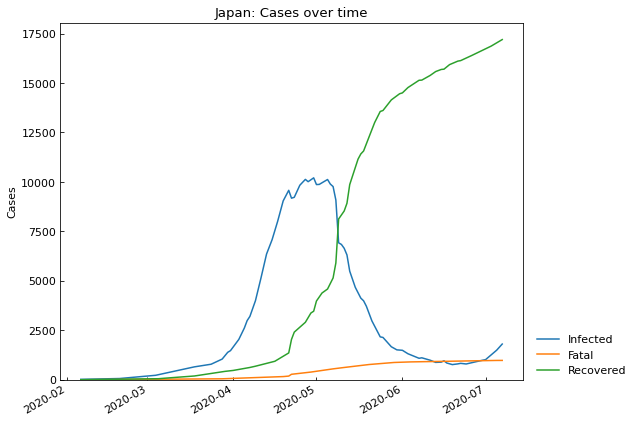

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
143,2020-07-03,Japan,-,19068,1226,976,16866
144,2020-07-04,Japan,-,19282,1346,977,16959
145,2020-07-05,Japan,-,19522,1495,977,17050
146,2020-07-06,Japan,-,19775,1674,977,17124
147,2020-07-07,Japan,-,19981,1806,978,17197


In [25]:
record_df = scenario.records()
record_df.tail()

### S-R trend analysis

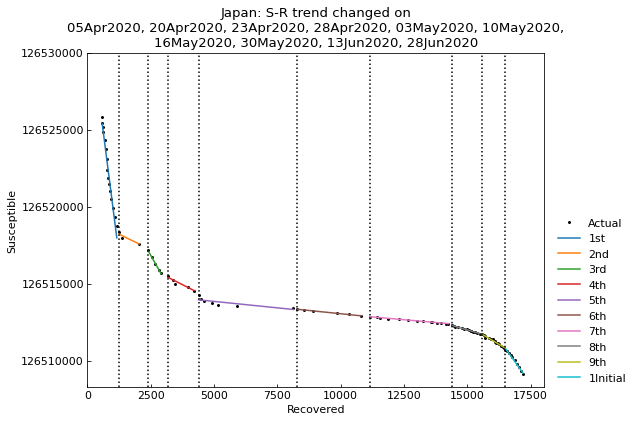

,Type,Start,End,Population
1st,Past,05Apr2020,19Apr2020,126529100
2nd,Past,20Apr2020,22Apr2020,126529100
3rd,Past,23Apr2020,27Apr2020,126529100
4th,Past,28Apr2020,02May2020,126529100
5th,Past,03May2020,09May2020,126529100
6th,Past,10May2020,15May2020,126529100
7th,Past,16May2020,29May2020,126529100
8th,Past,30May2020,12Jun2020,126529100
9th,Past,13Jun2020,27Jun2020,126529100
10th,Past,28Jun2020,07Jul2020,126529100


In [26]:
scenario.trend(set_phases=True)
scenario.summary()

### Hyperparameter estimation of ODE models
As an example, use SIR-F model.
We can use SIR, SIRD, (SIRFV), (SEWIRF).

In [27]:
scenario.estimate(cs.SIRF)


<Main scenario: perform parameter estimation>
Running optimization with 8 CPUs...
	10th phase with SIR-F model finished 249 trials in 0 min 25 sec.
	1st phase with SIR-F model finished 413 trials in 1 min 1 sec.
	2nd phase with SIR-F model finished 426 trials in 1 min 1 sec.
	3rd phase with SIR-F model finished 406 trials in 1 min 1 sec.
	4th phase with SIR-F model finished 415 trials in 1 min 1 sec.
	6th phase with SIR-F model finished 120 trials in 0 min 20 sec.
	5th phase with SIR-F model finished 430 trials in 1 min 1 sec.
	7th phase with SIR-F model finished 333 trials in 0 min 46 sec.
	8th phase with SIR-F model finished 208 trials in 0 min 30 sec.
	9th phase with SIR-F model finished 136 trials in 0 min 15 sec.
Completed optimization. Total: 4 min 21 sec


In [28]:
scenario.summary()

,Type,Start,End,Population,ODE,rho,sigma,theta,kappa,tau,Rt,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],RMSLE,Trials,Runtime
1st,Past,05Apr2020,19Apr2020,126529100,SIR-F,0.004014,0.000431,0.748340,0.000153,80,1.73,0.748,362,13,128,1.976465,413,1 min 1 sec
2nd,Past,20Apr2020,22Apr2020,126529100,SIR-F,0.002226,0.002473,0.430674,0.000087,80,0.49,0.431,638,24,22,0.194274,426,1 min 1 sec
3rd,Past,23Apr2020,27Apr2020,126529100,SIR-F,0.002019,0.000743,0.361510,0.000040,80,1.65,0.362,1371,27,74,0.261730,406,1 min 1 sec
4th,Past,28Apr2020,02May2020,126529100,SIR-F,0.001370,0.001153,0.537349,0.000045,80,0.53,0.537,1228,40,48,0.233790,415,1 min 1 sec
5th,Past,03May2020,09May2020,126529100,SIR-F,0.000722,0.001263,0.032658,0.000067,80,0.53,0.033,825,76,43,0.103990,430,1 min 1 sec
6th,Past,10May2020,15May2020,126529100,SIR-F,0.001185,0.003841,0.030714,0.000109,80,0.29,0.031,508,46,14,0.042588,120,0 min 20 sec
7th,Past,16May2020,29May2020,126529100,SIR-F,0.000907,0.004734,0.368640,0.000079,80,0.12,0.369,700,61,11,0.086260,333,0 min 46 sec
8th,Past,30May2020,12Jun2020,126529100,SIR-F,0.001956,0.004231,0.171364,0.000191,80,0.37,0.171,290,28,13,0.103632,208,0 min 30 sec
9th,Past,13Jun2020,27Jun2020,126529100,SIR-F,0.004903,0.004338,0.120237,0.000401,80,0.91,0.120,138,11,12,0.091943,136,0 min 15 sec
10th,Past,28Jun2020,07Jul2020,126529100,SIR-F,0.007419,0.002766,0.090946,0.000171,80,2.30,0.091,325,7,20,0.070807,249,0 min 25 sec


### Accuracy of estimation

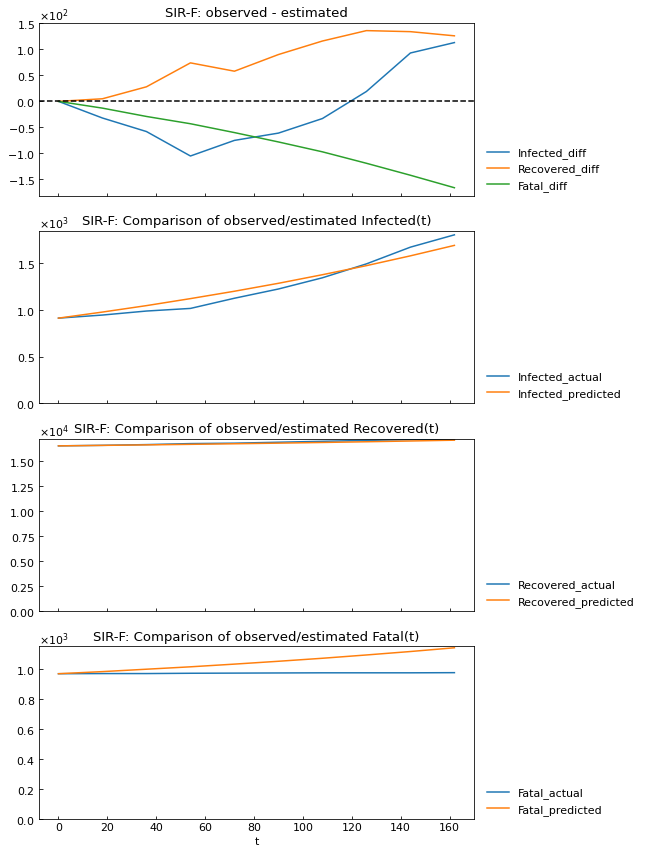

In [29]:
scenario.estimate_accuracy(phase="10th")

### Get parameter value

In [30]:
scenario.get("Rt", phase="4th")

0.53

### Show parameter history

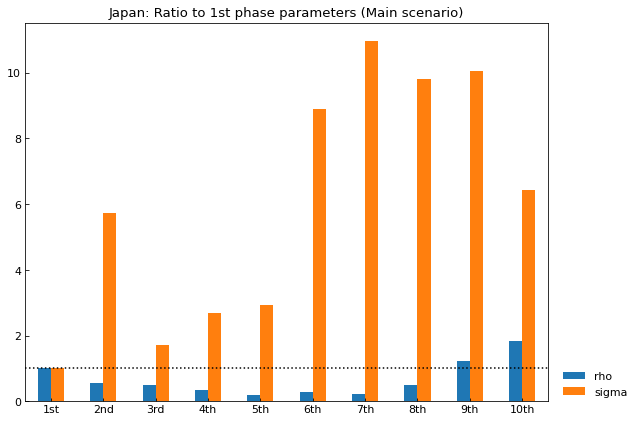

,rho,sigma
1st,1.000000,1.000000
2nd,0.554422,5.736390
3rd,0.503097,1.724042
4th,0.341278,2.674749
5th,0.179913,2.930318
6th,0.295190,8.910024
7th,0.225861,10.980183
8th,0.487178,9.813179
9th,1.221506,10.062728
10th,1.848103,6.417228


In [31]:
scenario.param_history(targets=["rho", "sigma"])

### Show the history of reproduction number

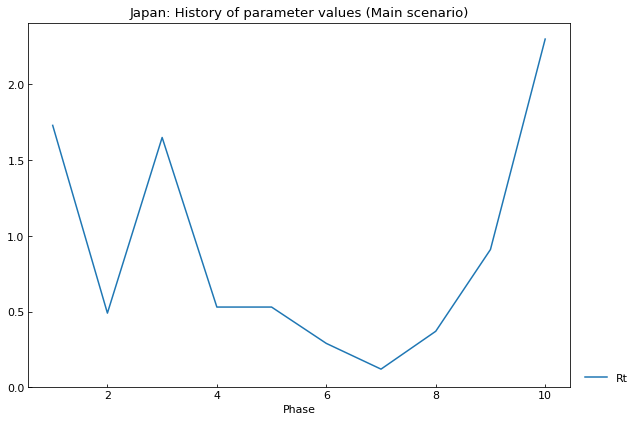

,Rt
1st,1.73
2nd,0.49
3rd,1.65
4th,0.53
5th,0.53
6th,0.29
7th,0.12
8th,0.37
9th,0.91
10th,2.30


In [32]:
scenario.param_history(targets=["Rt"], divide_by_first=False, show_box_plot=False)

### Simulate the number of cases

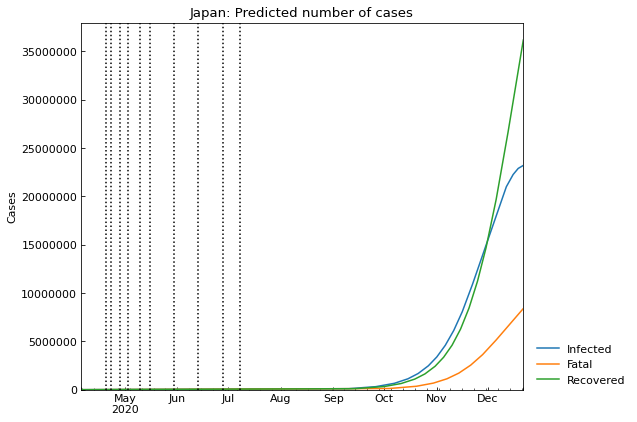

,Date,Fatal,Infected,Recovered,Susceptible
257,18Dec2020,7668245,22712026,32133136,64015693
258,19Dec2020,7876921,22891707,33269203,62491268
259,20Dec2020,8083754,23039236,34413446,60992663
260,21Dec2020,8288406,23154228,35564087,59522379
261,22Dec2020,8395535,23203074,36173175,58757318


In [33]:
scenario.clear(name="Main")
scenario.add_phase(name="Main", end_date="01Jan2021")
main_sim_df = scenario.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [34]:
sigma_current = scenario.get("sigma", name="Main", phase="last")
sigma_current

0.0027664984470759223

In [35]:
sigma_new = sigma_current * 2
sigma_new

0.005532996894151845

In [36]:
scenario.clear(name="Medicine")
scenario.add_phase(name="Medicine", days=30, sigma=sigma_current)
scenario.add_phase(name="Medicine", end_date="01Jan2021", sigma=sigma_new)
scenario.summary()

Type      Start        End  Population    ODE       rho  \
Scenario Phase                                                              
Main     1st      Past  05Apr2020  19Apr2020   126529100  SIR-F  0.004014   
         2nd      Past  20Apr2020  22Apr2020   126529100  SIR-F  0.002226   
         3rd      Past  23Apr2020  27Apr2020   126529100  SIR-F  0.002019   
         4th      Past  28Apr2020  02May2020   126529100  SIR-F  0.001370   
         5th      Past  03May2020  09May2020   126529100  SIR-F  0.000722   
         6th      Past  10May2020  15May2020   126529100  SIR-F  0.001185   
         7th      Past  16May2020  29May2020   126529100  SIR-F  0.000907   
         8th      Past  30May2020  12Jun2020   126529100  SIR-F  0.001956   
         9th      Past  13Jun2020  27Jun2020   126529100  SIR-F  0.004903   
         10th     Past  28Jun2020  07Jul2020   126529100  SIR-F  0.007419   
         11th   Future  08Jul2020  01Jan2021   126529100  SIR-F  0.007419   
Medicine 1st      Past  05Apr2020  19Apr2020   126529100  SIR-F  0.004014   
         2nd      Past  20Apr2020  22Apr2020   126529100  SIR-F  0.002226   
         3rd      Past  23Apr2020  27Apr2020   126529100  SIR-F  0.002019   
         4th      Past  28Apr2020  02May2020   126529100  SIR-F  0.001370   
         5th      Past  03May2020  09May2020   126529100  SIR-F  0.000722   
         6th      Past  10May2020  15May2020   126529100  SIR-F  0.001185   
         7th      Past  16May2020  29May2020   126529100  SIR-F  0.000907   
         8th      Past  30May2020  12Jun2020   126529100  SIR-F  0.001956   
         9th      Past  13Jun2020  27Jun2020   126529100  SIR-F  0.004903   
         10th     Past  28Jun2020  07Jul2020   126529100  SIR-F  0.007419   
         11th   Future  08Jul2020  07Aug2020   126529100  SIR-F  0.007419   
         12th   Future  08Aug2020  01Jan2021   126529100  SIR-F  0.007419   

                   sigma     theta     kappa  tau    Rt  alpha1 [-]  \
Scenario Phase                                                        
Main     1st    0.000431  0.748340  0.000153   80  1.73       0.748   
         2nd    0.002473  0.430674  0.000087   80  0.49       0.431   
         3rd    0.000743  0.361510  0.000040   80  1.65       0.362   
         4th    0.001153  0.537349  0.000045   80  0.53       0.537   
         5th    0.001263  0.032658  0.000067   80  0.53       0.033   
         6th    0.003841  0.030714  0.000109   80  0.29       0.031   
         7th    0.004734  0.368640  0.000079   80  0.12       0.369   
         8th    0.004231  0.171364  0.000191   80  0.37       0.171   
         9th    0.004338  0.120237  0.000401   80  0.91       0.120   
         10th   0.002766  0.090946  0.000171   80  2.30       0.091   
         11th   0.002766  0.090946  0.000171   80  2.30       0.091   
Medicine 1st    0.000431  0.748340  0.000153   80  1.73       0.748   
         2nd    0.002473  0.430674  0.000087   80  0.49       0.431   
         3rd    0.000743  0.361510  0.000040   80  1.65       0.362   
         4th    0.001153  0.537349  0.000045   80  0.53       0.537   
         5th    0.001263  0.032658  0.000067   80  0.53       0.033   
         6th    0.003841  0.030714  0.000109   80  0.29       0.031   
         7th    0.004734  0.368640  0.000079   80  0.12       0.369   
         8th    0.004231  0.171364  0.000191   80  0.37       0.171   
         9th    0.004338  0.120237  0.000401   80  0.91       0.120   
         10th   0.002766  0.090946  0.000171   80  2.30       0.091   
         11th   0.002766  0.090946  0.000171   80  2.30       0.091   
         12th   0.005533  0.090946  0.000171   80  1.18       0.091   

                1/alpha2 [day]  1/beta [day]  1/gamma [day]      RMSLE Trials  \
Scenario Phase                                                                  
Main     1st               362            13            128    1.97646    413   
         2nd               638            24             22   0.194274   

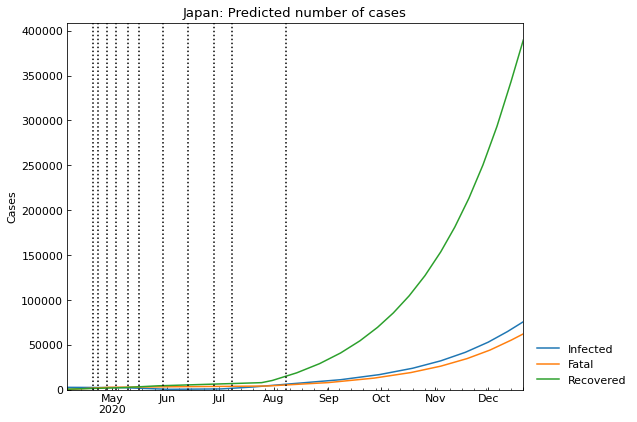

,Date,Fatal,Infected,Recovered,Susceptible
256,17Dec2020,58283,70997,363902,126035916
257,18Dec2020,59370,72304,371039,126026384
258,19Dec2020,60477,73635,378307,126016678
259,20Dec2020,61604,74990,385708,126006796
260,21Dec2020,62207,75714,389664,126001515


In [37]:
scenario.simulate(name="Medicine").tail()

## Compare the scenarios

In [38]:
scenario.describe()

,max(Infected),argmax(Infected),Infected on 22Dec2020,Fatal on 22Dec2020,Infected on 21Dec2020,Fatal on 21Dec2020
Main,23203074,22Dec2020,23203074.0,8395535.0,NaN,NaN
Medicine,75714,21Dec2020,NaN,NaN,75714.0,62207.0
